# Ejercicios 7



#### 1. Carga de datos

[Movilens Dataset](http://grouplens.org/datasets/movielens/) recoge datos de 6000 usuarios y 4000  películas. Un total de 1.000.000 de entradas. La información se distribuye en 3 tablas.

- ratings.dat - El fichero recoge datos de valoraciones  de los usuarios
- movies.dat - Datos de las películas
- users.dat - Datos personales de los usuarios


Toda esta información se utiliza con mucha frecuencia en los sistemas de recomendación que aplican algoritmos de aprendizaje.



Pasos a seguir:

__Paso 1__. Descargar los siguientes ficheros de datos en el directorio de trabajo.

[users](./ml-1m/users.dat)

[movies](./ml-1m/movies.dat)

[ratings](./ml-1m/ratings.dat)

__Paso 2__. Crear un DataFrame para cada uno de los ficheros.  Usar la función head() para visualizar los primeros datos.

* Los dataframes han de llamarse: `usuarios`, `peliculas` y `valoraciones`.
* Con respecto a la carga del fichero ratings (tenéis la instrucción de carga más abajo): 
    * tiene un campo de tipo fecha expresado en segundos. 
    * Indica en la función __read_csv__ que vas a parsear esa columna como una fecha.
    * Utiliza la función __datetime.fromtimestamp__ para parsear las fechas.  Para ello tendrás que indicarlo en el parámetro __date_parser__ de la función __read_table__.

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

ruta_ratings = 'ratings.dat'     # AQUÍ PONER LA RUTA DEL FICHERO


In [3]:
pwd

'C:\\Users\\valen\\Desktop\\Master Datascience\\Python\\Cunef_Bloque4\\Ejercicios_full'

In [24]:
usuarios = pd.read_csv('users.txt', sep = "::", header = None,
                    names = ['id_usuario','sexo','campo3','campo4','campo5'],
                       engine = 'python')
usuarios.head()

,id_usuario,sexo,campo3,campo4,campo5
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
peliculas = pd.read_csv('movies.dat', sep = "::", header = None,
                        names = ['id_peli','nombre_peli','tipo_peli'],
                        engine = 'python')
peliculas.head()

,id_peli,nombre_peli,tipo_peli
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# Sol apartado 1:

from datetime import datetime
dateparse = lambda x: datetime.fromtimestamp(float(x))

valoraciones = pd.read_csv(ruta_ratings, sep = '::', header = None,
                         names = ['id_usuario', 'id_peli', 'puntuacion', 'Fecha'],
                         engine ='python',
                         parse_dates=[3], date_parser=dateparse)
                         

valoraciones.head()

,id_usuario,id_peli,puntuacion,Fecha
0,1,1193,5,2000-12-31 23:12:40
1,1,661,3,2000-12-31 23:35:09
2,1,914,3,2000-12-31 23:32:48
3,1,3408,4,2000-12-31 23:04:35
4,1,2355,5,2001-01-07 00:38:11


#### 2. Diagrama de Frecuencias

In [7]:
#en primer lugar vamos a ver en la tabla peliculas el ID de X-Men(2000)
peliculas[peliculas.nombre_peli == 'X-Men (2000)']

,id_peli,nombre_peli,tipo_peli
3724,3793,X-Men (2000),Action|Sci-Fi


In [8]:
#construimos un dataframe con las puntuaciones para la pelicula
valoraciones_xmen = valoraciones[valoraciones.id_peli == 3793]
valoraciones_xmen.head()

,id_usuario,id_peli,puntuacion,Fecha
276,5,3793,2,2000-12-31 07:12:50
527,7,3793,3,2000-12-31 04:52:17
700,9,3793,4,2000-12-31 02:19:41
1734,17,3793,4,2000-12-30 07:44:49
1950,18,3793,5,2000-12-30 06:12:26


In [9]:
#agrupamos las valoraciones por puntuaciones
#aplicamos la función count para saber el número de veces que hay esa puntuacion
t = valoraciones_xmen.groupby(['puntuacion']).count()
t

,id_usuario,id_peli,Fecha
puntuacion,,,
1,29,29,29
2,89,89,89
3,351,351,351
4,697,697,697
5,345,345,345


In [10]:
#creamos un nuevo dataframe con las puntuaciones y la frecuencia de las mismas.
valoraciones_xmen.pivot_table(index = 'id_peli', columns = 'puntuacion', values = 'id_usuario', aggfunc= sum)

puntuacion,1,2,3,4,5
id_peli,,,,,
3793,75656,217768,858231,1738929,938796


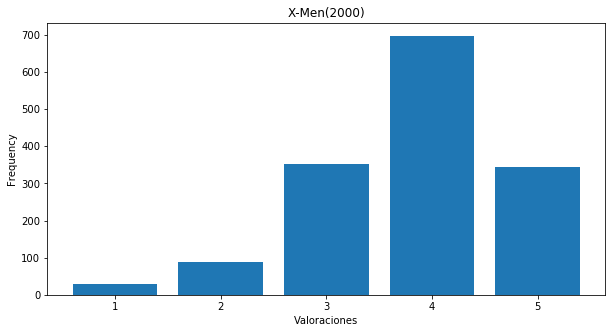

In [12]:
fig, ax = plt.subplots(nrows = 1, figsize=(10,5))
ax.bar(t.index, t.id_usuario)  


ax.set_title('X-Men(2000)')
ax.set_xlabel('Valoraciones')
ax.set_ylabel('Frequency');

Los usuarios valoran las películas con valores del 1 al 5 donde el 1 es la peor puntuación y 5 es la mejor. La puntuación es una variable categórica. 
Representa mediante un diagrama de Frecuencias (tipo hist) la frecuencia de los votos de la película con título __X-Men (2000)__.

El gráfico que tienes que construir debe tener el siguiente aspecto:

![Diagrama](mi_diagrama.png)

__Notas:__

* El título de la película está en el dataframe __películas__.

#### 3. Puntuación media

Calcula la puntuación media  de cada película por sexo del usuario. Diseña una función llamada __puntuacion_media__ que devuelve un Dataframe donde el índice es el título de la película y las columnaa son 'F' y 'M' (Female y Male respectivamente).

__Nota__:
Hay varias formas de hacerlo. Aquí os dejo alguna sugerencia:
* Necesitamos combinar las tres tablas ya que tenemos, por un lado las valoraciones, por otro el título de la película y por otro el sexo de los usuarios. La operación merge te permitirá realizar la  combinación
    * Combina primero las valoraciones con las peliculas por el campo 'id_peli'.
    * Combina el resultado anterior con los usuarios por el campo 'id_usuario'.
    
* Una vez combinadas las tres tablas en una sola tabla:
    * solución 1:  Agrupar por id_peli y por sexo del usuario. La función de agregación es la media mean(). Para obtener la tabla pedida utiliza `unstack` para deshacer el multi índice.
    * solución 2: Consulta la ayuda de la función __pivot_table__. Utiliza la función __pivot_table__. Esta no la hemos visto en la teoría, pero es muy interesante y útil. Merece la pena que intentéis resolverlo también utilizando esta opción.


In [31]:
# Sol:
def puntuacion_media():
    union1 = pd.merge(peliculas, valoraciones, how='outer',
                on = ['id_peli','id_peli'])
    union2 = pd.merge(union1, usuarios, how= 'outer',
                 on = ['id_usuario','id_usuario'])
    
    return union2.pivot_table(index = 'nombre_peli', columns = 'sexo', values = 'puntuacion')

In [32]:
puntuacion_media()

sexo,F,M
nombre_peli,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


#### 4. Mejor valoradas por mujeres

Ahora queremos conocer las películas mejor valoradas por las mujeres. Crea una función llamada __mejor_valoradas_mujeres__. Utiliza el dataFrame devuelto por la función __puntuacion_media__ del apartado anterior y devuelve un DataFrame ordenado de forma apropiada. 

__Nota__:

* Utiliza la función __sort_values__ para ordenar los resultados.

In [39]:
def mejor_valoradas_mujeres(data):
    return data.sort_values(by= ['F'], ascending = False)

In [40]:
mejor_valoradas_mujeres(puntuacion_media())

sexo,F,M
nombre_peli,,
Clean Slate (Coup de Torchon) (1981),5.000000,3.857143
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.000000,3.428571
Raw Deal (1948),5.000000,3.307692
Bittersweet Motel (2000),5.000000,NaN
Skipped Parts (2000),5.000000,4.000000
Lamerica (1994),5.000000,4.666667
"Gambler, The (A Játékos) (1997)",5.000000,3.166667
"Brother, Can You Spare a Dime? (1975)",5.000000,3.642857
Ayn Rand: A Sense of Life (1997),5.000000,4.000000


In [ ]:
# Sol: 
def mejor_valoradas_mujeres(data):
    """ Calcula las películas mejor valoradas por las mujeres
    Args:
         @type data: dataframe             

    Returns: 
        @rtype: dataframe
    
    Examples:
     >>> mejor_valoradas_mujeres(data)
     genero_u                                               F           M
     titulo
        Clean Slate (Coup de Torchon) (1981)         5.000000    3.857143
        Ballad of Narayama, The (Narayama Bushiko)   5.000000    3.428571
        Raw Deal (1948)                              5.000000    3.307692
        Bittersweet Motel (2000)                     5.000000    NaN
        Skipped Parts (2000)                         5.000000    4.000000
        Lamerica (1994)                              5.000000    4.666667